In [1]:
#importing useful python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix#,confusion_matrix_at_thresholds
#from sklearn.metrics import confusion_matrix_at_thresholds

In [2]:
#loading dataset
df = pd.read_parquet("subset of baseline with samples 50neg & pos.parquet")

In [3]:
#stepping forward with useful numerical data only
X = df.drop(columns=['object','cluster', 'cluster_id']).values

In [4]:
# object column contains names like 'ZTF18abc...' or non-ZTF names : Binary conversion of objects
y = np.where(df['object'].str.contains('ZTF', case=False),
             -1,   # ZTF → negative
              1)   # non-ZTF → positive

In [5]:
#runthrough
X

array([[ 1.36883456e+01,  1.36851629e+01,  3.58837566e-01, ...,
         5.20519968e+02,  4.32772256e-01,  7.68013461e-01],
       [ 1.73201972e+01,  1.72437497e+01,  2.78425993e-01, ...,
         1.30468214e+02,  8.65308001e-01,  8.04507225e-01],
       [ 1.54368865e+01,  1.54330198e+01,  1.30212161e-01, ...,
         6.32769913e+01,  4.11711919e-01,  7.86535165e-01],
       ...,
       [ 1.80104926e+01,  1.72123293e+01,  1.23640135e+00, ...,
         4.53392793e+02,  8.65250910e-01,  8.86083625e-01],
       [ 1.70137729e+01,  1.69835731e+01,  2.21157098e-01, ...,
         9.81349013e+01,  1.31091092e+00,  6.70645606e-01],
       [ 1.63111787e+01,  1.63002903e+01,  1.86079931e-01, ...,
         1.17600481e+02, -7.29353574e-01,  8.29970429e-01]])

In [89]:
#run accuracy
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
)

final_model = RandomForestClassifier(
    n_estimators=60,
    class_weight="balanced",
   
)

final_model.fit(X_train, y_train)

test_accuracy = final_model.score(X_test, y_test)
print("\nFinal test accuracy:", test_accuracy)



Final test accuracy: 0.975


In [90]:
#measuring robustness through 5-fold cross-validation.
scores = cross_val_score(
    clf,
    X,
    y,
    cv=5
)

print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())
print("Std CV accuracy:", scores.std())


Cross-validation scores: [0.96875 0.95    0.975   0.975   0.96875]
Mean CV accuracy: 0.9675
Std CV accuracy: 0.009185586535436928


In [91]:
# Save training set
df_train = pd.DataFrame(X_train)
df_train['y'] = y_train
df_train.to_csv("training_set.csv", index=False)

# Save test set
df_test = pd.DataFrame(X_test)
df_test['y'] = y_test
df_test.to_csv("test_set.csv", index=False)

In [95]:
#Train the Random Forest classifier
clf = RandomForestClassifier(
    n_estimators=60,      # number of trees in my forest
    #random_state=None,     # different forest each run
)

clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=60)

In [96]:
# Check class probabilities for the test set.
# predict_proba returns an array of shape (N_test, 2),
# where N_test is the number of test objects.
# Column 0 → probability of class -1 (negative, ZTF)
# Column 1 → probability of class +1 (positive, non-ZTF)
probs = clf.predict_proba(X_test)
print('probs',probs)

probs [[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.28333333 0.71666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.05       0.95      ]
 [1.         0.        ]
 [0.95       0.05      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.48333333 0.51666667]
 [0.88333333 0.11666667]
 [0.98333333 0.01666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.31666667 0.68333333]
 [1.         0.        ]
 [0.93333333 0.06666667]
 [0.98333333 0.01666667]
 [0.53333333 0.46666667]
 [0.56666667 0.43333333]
 [1.         0.        ]
 [0.98333333 0.01666667]
 [0.91666667 0.08333333]
 [0.98333333 0.01666667]
 [1.         0.        ]
 [0.53333333 0.46666667]
 [1.         0.        ]
 [0.23333333 0.76666667]
 [0.76666667 0.23333333]
 [0.05       0.95      ]
 [0.96666667 0.03333333]
 [0.98333333 0.01666667]
 [0.98333333 0.01666667]
 [1.         0.        ]
 [0.98333333 0.01666667]
 [1.         0.        ]
 [0.98333333 0.01666667]
 [1.         0.    

Confusion matrix (raw counts):
[[135   2]
 [  5  18]]


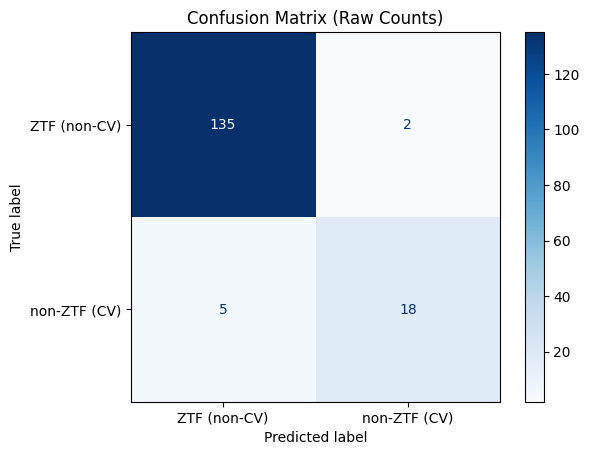

In [97]:
# CONFUSION MATRIX + TP / TN / FP / FN IDENTIFICATION
# Class labels for clarity
class_names = ["ZTF (non-CV)", "non-ZTF (CV)"]

# Plot confusion matrix (raw counts)
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues #heatmap
)

disp.ax_.set_title("Confusion Matrix (Raw Counts)")
print("Confusion matrix (raw counts):")
print(disp.confusion_matrix)

plt.show()


# Extract TN, FP, FN, TP explicitly
# Label convention used in YOUR code:
#   -1 → ZTF (negative, non-CV)
#   +1 → non-ZTF (positive, CV)

cm = confusion_matrix(y_test, clf.predict(X_test), labels=[-1, 1])

TN, FP, FN, TP = cm.ravel()




In [98]:
#this is for checking the class_weight part
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X,
    y,
    test_size=0.20,
)

final_model_1 = RandomForestClassifier(
    n_estimators=60,
    #class_weight="balanced",
   
)

final_model.fit(X_train_1, y_train_1)

test_accuracy = final_model.score(X_test_1, y_test_1)
print("\nFinal test accuracy:", test_accuracy)



Final test accuracy: 0.96875


Confusion matrix (raw counts):
[[146   0]
 [  0  14]]


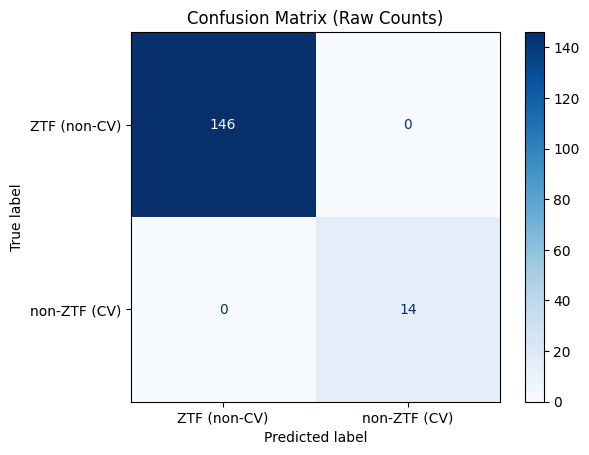

In [99]:
# CONFUSION MATRIX + TP / TN / FP / FN IDENTIFICATION
# Class labels for clarity
class_names = ["ZTF (non-CV)", "non-ZTF (CV)"]

# Plot confusion matrix (raw counts)
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test_1,
    y_test_1,
    display_labels=class_names,
    cmap=plt.cm.Blues #heatmap
)

disp.ax_.set_title("Confusion Matrix (Raw Counts)")
print("Confusion matrix (raw counts):")
print(disp.confusion_matrix)

plt.show()


# Extract TN, FP, FN, TP explicitly
# Label convention used in YOUR code:
#   -1 → ZTF (negative, non-CV)
#   +1 → non-ZTF (positive, CV)

cm = confusion_matrix(y_test_1, clf.predict(X_test_1), labels=[-1, 1])

TN, FP, FN, TP = cm.ravel()




In [100]:
y_test_1.shape

(160,)

In [101]:
y_test.shape

(160,)

In [102]:
sum(y_test==1)

23

In [103]:
sum(y_test==-1)

137

In [105]:
#n_objects_in_test stores the number of samples in the test dataset, ensuring that the randomly generated label vector has the same dimensionality as y_test
n_objects_in_test = len(y_test)

y_random = np.random.choice(
    [-1, 1],
    size=n_objects_in_test,
    replace=True
)

In [106]:
sum(y_random==1)

73

In [107]:
sum(y_random==-1)

87

In [108]:
sum(y_random==y_test)

92

In [109]:
random_acc = accuracy_score(y_test, y_random)

print("Random baseline accuracy:", random_acc)

Random baseline accuracy: 0.575
